In [98]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.9.1+cpu


In [99]:
import torch
print(torch.version.cuda)       # CUDA version PyTorch is using
print(torch.cuda.is_available())

None
False


## Intordcution to Tensors
creating 


In [100]:
scaler=torch.tensor(7)
scaler

tensor(7)

In [101]:
scaler.ndim

0

In [102]:
vector=torch.tensor([2,2])
vector

tensor([2, 2])

In [103]:
vector.ndim

1

In [104]:
MATRIX=torch.tensor([[1,3],[7,8]])
MATRIX

tensor([[1, 3],
        [7, 8]])

In [105]:
MATRIX.ndim

2

In [106]:
MATRIX.shape

torch.Size([2, 2])

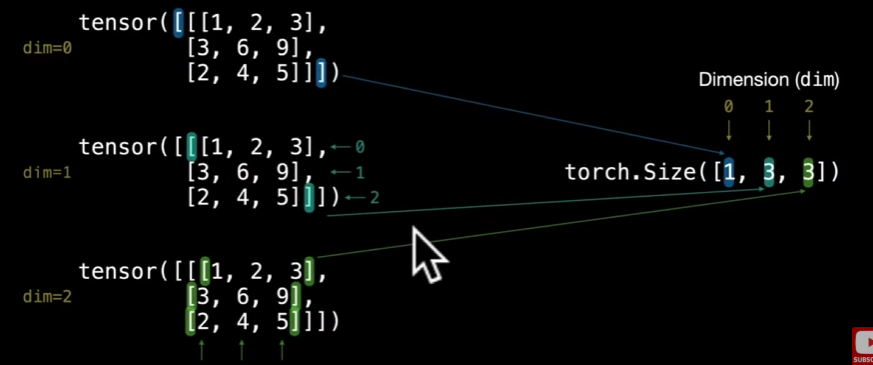

In [107]:
TENSOR=torch.tensor([[[1,2,3],[3,5,7],[8,9,3]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 5, 7],
         [8, 9, 3]]])

In [108]:
TENSOR.ndim

3

In [109]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 5, 7],
        [8, 9, 3]])

### Random Tensors
why random tensors?

random tensors are important beacuse the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent data

In [110]:
random_tensor=torch.rand(3,3)
random_tensor

tensor([[0.4951, 0.9041, 0.6694],
        [0.1448, 0.2330, 0.5498],
        [0.7693, 0.3522, 0.6094]])

In [111]:
random_tensor.ndim

2

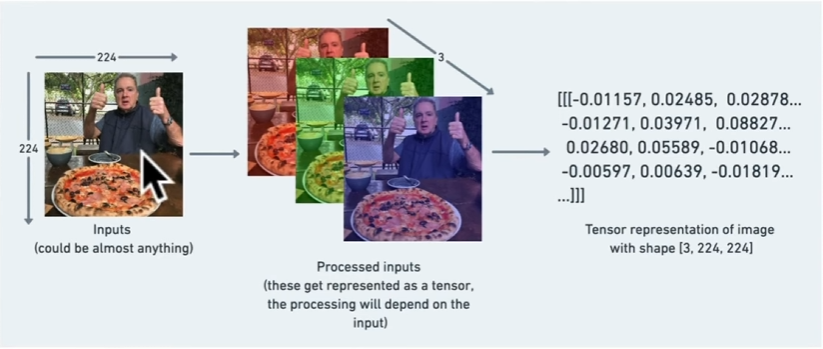

In [112]:
random_image=torch.rand(size=(224,224,3))
random_image.shape  ,random_image.ndim

(torch.Size([224, 224, 3]), 3)

In [113]:
torch.rand(size=(3,3))

tensor([[0.7678, 0.9744, 0.2857],
        [0.4311, 0.9411, 0.2992],
        [0.8817, 0.8280, 0.2191]])

### Zeros and ones


In [114]:
#create a tensor with zeros
zeros=torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [115]:
#create a tensor with ones
ones=torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [116]:
ones.dtype

torch.float32

In [117]:
zeros.dtype

torch.float32

### creating a range of tensors and tensors-like

In [118]:
one_to_ten=torch.arange(1,11)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [119]:
one_to_thousen=torch.arange(start=1,end=50,step=4)
one_to_thousen

tensor([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49])

In [120]:
zeros=torch.zeros_like(input=one_to_thousen)
zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

In [121]:
#Float 32 tensor
float_32_tensor =torch.tensor([3.0,6.0,7.0],
                              dtype=None,#what is the datatypes (ex:dtype32)
                              device=None,#
                              requires_grad=False)
float_32_tensor

tensor([3., 6., 7.])

In [122]:
float_16_tensor=float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 7.], dtype=torch.float16)

In [123]:
float_16_tensor*float_32_tensor

tensor([ 9., 36., 49.])

In [124]:
int_32_tensor=torch.tensor([3,5,9],dtype=torch.int32)
int_32_tensor

tensor([3, 5, 9], dtype=torch.int32)

###                    Getting information from tensors (tensor attributes)

1. Tensor not right datatype - to get datatype from a tensor ,can use `tensor.dtype`
2. Tensor not right shape - to get shape from a tensor, can use `tensor.shape`
3. Tensor not on the right device - to get device from a tensor, can use `tensor.device`

In [125]:
# create a tensor
some_tensor=torch.rand(3,4)
some_tensor
print(some_tensor)
print(some_tensor.dtype)
print(some_tensor.shape)
print(some_tensor.device)

tensor([[0.8619, 0.1040, 0.5697, 0.6607],
        [0.9607, 0.1793, 0.6207, 0.3585],
        [0.8387, 0.6615, 0.9279, 0.2958]])
torch.float32
torch.Size([3, 4])
cpu


### Manipulating Tensors (Tensor operations)

Tensor operation includes 
* addition
* subtraction
* multipication (element-wise)
* Division
* Matrix multipication

In [126]:
# create a tensor and add 10 to it 
tensor= torch.tensor([1,2,3])
tensor=tensor*10
tensor=tensor+10

In [127]:
tensor=tensor-10
tensor

tensor([10, 20, 30])

In [128]:
#try out build in pytorch in-build funtion

multipication_tensor=torch.mul(tensor,100)
addition_tensor=torch.add(tensor,23)


In [129]:
multipication_tensor

tensor([1000, 2000, 3000])

In [130]:
addition_tensor

tensor([33, 43, 53])

### Matrix multipication

1. Element-wise multipication
2. matrix multipication (dot product)

There are two main rules that performing matrix multipication nedd to satisfy:
1. The **inner dimenions** must match 
* (3,2) @ (3,2) wont work
* (2,3) @ (3,2) will work
2. The resulting matrix has the shape of the **outer dimentions**
* (2,3) @ (3,2) => (2,2)
* (3,2) @ (2,3) => (3,3)

In [131]:
print(tensor,"*",tensor)
print(f"equels:{tensor*tensor}")

tensor([10, 20, 30]) * tensor([10, 20, 30])
equels:tensor([100, 400, 900])


In [132]:
torch.matmul(tensor,tensor)

tensor(1400)

#### one of the most comman errors in deep learning 


In [133]:
#Shape for matrix multipication
tensor_A=torch.tensor([[1,2],
                      [3,4],
                      [5,6]])
tensor_B=torch.tensor([[7,8],
                      [9,10],
                      [11,12]])


To fix this tensor shape issue, we can manipulate the shape of one of our tensors using **transpose** 
A **transpose** switch the axes or dimentions of a given tensor

In [134]:
Transpose_tensor_B=tensor_B.T
Transpose_tensor_B, Transpose_tensor_B.shape

(tensor([[ 7,  9, 11],
         [ 8, 10, 12]]),
 torch.Size([2, 3]))

In [135]:
# The matric multipication operation works when thensor_b is Transposed
torch.matmul(tensor_B,Transpose_tensor_B)

tensor([[113, 143, 173],
        [143, 181, 219],
        [173, 219, 265]])

In [136]:
print(f"Original shape : tensor_A :{tensor_A.shape}  and  tensor_B : {tensor_B.shape} ")
print(f"New shapes : tensor_A :{tensor_A.shape} (same as above) , tensor_B.T={Transpose_tensor_B.shape}")
print(f"Multiplying :{tensor_A.shape} @ {Transpose_tensor_B.shape} <- inner dimention must match")
print("output:\n")
output=torch.matmul(tensor_B,Transpose_tensor_B)
print(output)
print(f"\nOutput shape:{output.shape}")

Original shape : tensor_A :torch.Size([3, 2])  and  tensor_B : torch.Size([3, 2]) 
New shapes : tensor_A :torch.Size([3, 2]) (same as above) , tensor_B.T=torch.Size([2, 3])
Multiplying :torch.Size([3, 2]) @ torch.Size([2, 3]) <- inner dimention must match
output:

tensor([[113, 143, 173],
        [143, 181, 219],
        [173, 219, 265]])

Output shape:torch.Size([3, 3])


### Finding the min, max, sum, etc (tensor aggregation)

In [137]:
x=torch.arange(1,100,10)
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [138]:
torch.min(x) ,min(x)

(tensor(1), tensor(1))

In [139]:
torch.max(x) ,max(x)

(tensor(91), tensor(91))

In [140]:
#Find the mena : note: the torch.mean() funtion requires a tensor of float32 datatype to work
torch.mean(x.type(torch.float32))

tensor(46.)

In [141]:
torch.sum(x)

tensor(460)

### Finding the postion min max 

In [142]:
# find the postion in the tensor that has minimum value with argmin() ->returns index position of the target value occurs
x.argmin()

tensor(0)

In [143]:
#Find the postion in the tensor that has the maximum value with argmax()
x.argmax()

tensor(9)

## Reshaping, stacking, squeezing and unsqueezing tensors

* Reshaping- reshape an input tensor to a defined shape
* view - return a view of an input tensor of certain shape but keep the same memory as the original tensor
* Stacking-combine multiple tensors on top of each other (stack) or side by side (hstack)
* Squeeze-remove all `1` dimension to a target tensor 
* unsqueeze-add a  `1` dimension to a target tensor
* Permute-Return a view of input with dimensions permuted(swapped) in a certain way

In [144]:
# Lets create a tensor
import torch 
x=torch.arange(1.,10.)
x,x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [145]:
# Add and extra dimension
x_reshaped=x.reshape(1,9)
x_reshaped,x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [146]:
#change the View
z=x.view(1,9)
z,z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [147]:
# Change z changes x (because a view of tensor shared the same memory as the original )
z[:,0]=5
z,x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [148]:
# stack tensors on top of each other
x_stacked=torch.stack([x,x,x,x])
x_stacked,x_stacked.shape

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
         [5., 2., 3., 4., 5., 6., 7., 8., 9.],
         [5., 2., 3., 4., 5., 6., 7., 8., 9.],
         [5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 torch.Size([4, 9]))

In [149]:
# torch.squeeze() -remove all the single dimensions from a tensor
print(f"Previous tensor:{x_reshaped}")
print(f"Shape before squeeze:{x_reshaped.shape}")

#remove extra dimensions from x_reshaped
x_squeezed=torch.squeeze(x_reshaped)
print(f"\nNew Tensor:{x_squeezed}")
print(f"New shape:{x_squeezed.shape}")

Previous tensor:tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Shape before squeeze:torch.Size([1, 9])

New Tensor:tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape:torch.Size([9])


In [150]:
#torch.unsqueeze() - add a single dimension to a target tensor at a specific dim(dimension)
print(f"previous target:{x_squeezed}")
print(f"Previous shape :{x_squeezed.shape}")

#add an extra dimension with unsqueeze
x_unsqueeze=torch.unsqueeze(x_squeezed,dim=0)
print(f"\nNew tensor:{x_unsqueeze}")
print(f"New shape{x_unsqueeze.shape}")

previous target:tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape :torch.Size([9])

New tensor:tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New shapetorch.Size([1, 9])


In [151]:
#torch.permute - rearrange the dimensions of a target of a target tensor ina a specified order 
x_original=torch.rand(size=(224,224,3)) #[height,width,colour_channels]

#Permute the original tensor to rearrange the axis  (or dim) order
x_permuted=x_original.permute(2,0,1) #shifts axis 0->1 ,1->2 ,2->0
x_permuted.shape

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


## Indexing (selecting data from tensors)
### indexing with PyTorch is similar to indexing with NumPy


In [152]:
x=torch.arange(1,10).reshape(1,3,3)
x,x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [153]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [154]:
# Lets index on the middle dimension
x[0][0]

tensor([1, 2, 3])

In [155]:
#lets index on the most inner bracket(last dimension)
x[0][0][0]

tensor(1)

In [156]:
x[0][2][2]

tensor(9)

In [157]:
# you can also use ":" to select all of the target dimensions
x[:,0]

tensor([[1, 2, 3]])

In [158]:
#get all values of 0th and the 1st dimensions but only index 1 of 2nd dimension
x[:,:,1]

tensor([[2, 5, 8]])

In [159]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:,1,1]

tensor([5])

In [160]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0,0,:]

tensor([1, 2, 3])

In [161]:
#Index on x to return 9
print(x[0,2,2])

#Index on x to return 3
print(x[0,0,2])

tensor(9)
tensor(3)


## PyTorch tensor & NumPy

NumPy is popular scientific python numerical computing library.
And because of this, PyTorch has Functionality to interact with it.
PyTorch tensor->NumPy->`torch.Tensor.numpy()`

In [ ]:
import numpy as np

array=np.arange(1.0,8.0)
tensor=torch.from_numpy(array)
array,tensor

In [168]:
import torch
import numpy as np

print("PyTorch version:", torch.__version__)
print("NumPy version:", np.__version__)


PyTorch version: 2.9.1+cpu
NumPy version: 2.4.1


In [171]:
torch.arange(1.0,8.0)

tensor([1., 2., 3., 4., 5., 6., 7.])

## Reproducbility (trying to take random out of random)

In short how a neural network lerns:
`start with random number -> tensor operation-> update random numbers to try and make them better representations of the data -> again -> again -> again `

To reduce the randomness in neural networks and PyTorch comes the concept of a random seed.
Essentially what the random seed does is "flavour" the randomness

In [172]:
torch.rand(3,3)

tensor([[0.7345, 0.3054, 0.6733],
        [0.2312, 0.2543, 0.3307],
        [0.7662, 0.0847, 0.2033]])

In [173]:
random_tensor_A=torch.rand(3,4)
random_tensor_B=torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A==random_tensor_B)

tensor([[0.8700, 0.2861, 0.0195, 0.5000],
        [0.6751, 0.8673, 0.2587, 0.3886],
        [0.1791, 0.8119, 0.9357, 0.9176]])
tensor([[0.5387, 0.5934, 0.8650, 0.2847],
        [0.9962, 0.7172, 0.0950, 0.7734],
        [0.4150, 0.6492, 0.6508, 0.0473]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [183]:
#lets make random seeds but reprouducible tensors
#set the random seed
RANDOM_SEED=42
torch.manual_seed(RANDOM_SEED)
random_tensorC=torch.rand(3,4)

torch.manual_seed(RANDOM_SEED)
random_tensorD=torch.rand(3,4)

print(random_tensorC)
print(random_tensorD)
print(random_tensorC==random_tensorD)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])
